# Parameter calculation sandbox

In [1]:
import rasterio as rio
import numpy as np
import sys
import re
import os
from matplotlib import pyplot as plt 
from spectral import *
import spectral.io.envi as envi
data_path = os.path.abspath(os.path.join('/Volumes/Utumno/HySpex_training_data/RockGarden2022/RAD'))
plt.rcParams["figure.figsize"] = (20,10)

## Data ingest

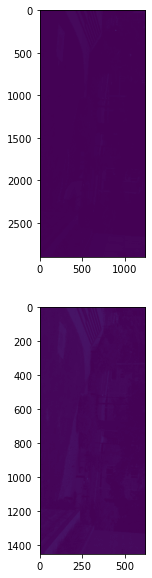

In [2]:
sfile = data_path + '/RAD_SWIR/rockGardenTest_Mjolnir_S620_SN7062_39781us_2022-06-01T195010_raw_rad_keystone_smile_float32.img'
vfile = data_path + '/RAD_VNIR/rockGardenTest_Mjolnir_V1240_SN5011_19784us_2022-06-01T195010_raw_rad_keystone_smile_float32.img'
shdr = data_path + '/RAD_SWIR/rockGardenTest_Mjolnir_S620_SN7062_39781us_2022-06-01T195010_raw_rad_keystone_smile_float32.hdr'
vhdr = data_path + '/RAD_VNIR/rockGardenTest_Mjolnir_V1240_SN5011_19784us_2022-06-01T195010_raw_rad_keystone_smile_float32.hdr'
s_ = envi.open(shdr)
v_ = envi.open(vhdr)
s = s_.load()
v = v_.load()

In [ ]:
# preview
plt.subplot(2,1,1)
plt.imshow(v[:,:,100])
plt.subplot(2,1,2)
plt.imshow(s[:,:,100])

## Calculate MNF

In [ ]:
s_signal = calc_stats(s)
s_noise = noise_from_diffs(s)
s_mnfr = mnf(s_signal, s_noise)
s_mnf10 = s_mnfr.reduce(s, num=10)

v_signal = calc_stats(v)
v_noise = noise_from_diffs(v)
v_mnfr = mnf(s_signal, v_noise)
v_mnf10 = v_mnfr.reduce(v, num=10)

In [ ]:
# plt.rcParams["figure.figsize"] = (20,10)
# plt.figure()
# plt.imshow(np.flip(np.transpose(v_mnf10[:,:,(1,2,3)],(1,0)),axis=0))
plt.imshow(np.flip(np.transpose(v_mnf10[:,:,(1,2,3)],(1,0,2)),axis=0))
# plt.show()
# plt.savefig('/Users/phillms1/Documents/Work/RAVEN/rock_garden_v100.png')

<open DatasetReader name='/Volumes/Utumno/HySpex_training_data/RockGarden2022/RAD/RAD_SWIR/rockGardenTest_Mjolnir_S620_SN7062_39781us_2022-06-01T195010_raw_rad_keystone_smile_float32.img' mode='r'>

In [13]:
# s.descriptions[8]
s8 = s.read(8)

In [16]:
plt.plot(

0.0091988975

In [34]:
ss = envi.open(data_path + '/RAD_SWIR/rockGardenTest_Mjolnir_S620_SN7062_39781us_2022-06-01T195010_raw_rad_keystone_smile_float32.hdr',data_path + '/RAD_SWIR/rockGardenTest_Mjolnir_S620_SN7062_39781us_2022-06-01T195010_raw_rad_keystone_smile_float32.img')

In [37]:
ss100 = ss.read_band(100)

In [42]:
np.shape(ss_)

(1454, 620, 300)

In [39]:
ss_ = ss.load()
signal = calc_stats(ss_)
noise = noise_from_diffs(ss_)
mnfr = mnf(signal, noise)
mnf20 = mnfr.reduce(ss_, num=20)

In [71]:
p1std

0.01945187

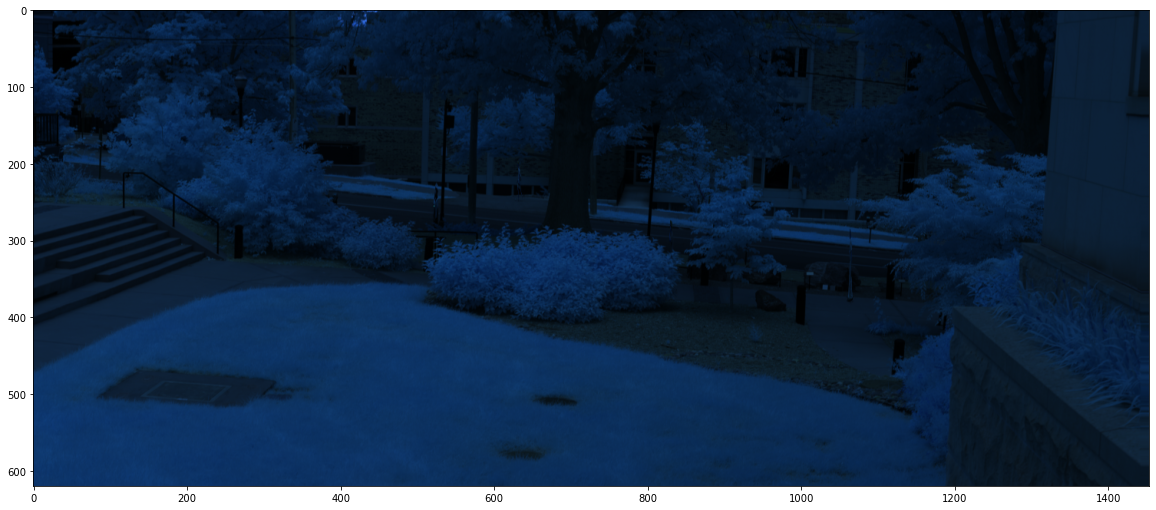

In [105]:
# plt.imshow(np.flip(np.transpose(mnf20[:,:,(2,3,4)],(1,0,2)),axis=0))
# plt.savefig('/Users/phillms1/Documents/Work/RAVEN/rock_garden_vMNF234.png')
# m1std = np.mean(ss_[:,:,131]) - np.std(ss_[:,:,131]);
# p1std = np.mean(ss_[:,:,12]) + np.std(ss_[:,:,12]);
maxI = np.max(ss_[:,:,(131,51,12)])
normI = ss_[:,:,(131,51,12)]/maxI
# m1std = np.mean(normI) - 0.0000001*np.std(normI);
# p1std = np.mean(normI) + 0.0000001*np.std(normI);
plt.imshow(np.flip(np.transpose(normI,(1,0,2)),axis=0),vmin=m1std,vmax=p1std)
plt.show()

In [57]:
ss.metadata

{'description': 'Frameperiod = 80000\nIntegration time = 39781\nBinning = 1\nNumber of frames = 1454\nAperture size = 0.00489999999999999984\ndw = 1\nEQ = 0\nLens = 0\nHSNR = 0\nCalibAvailable = 0\nNumber of background = 200\nPixelsize x = 0.00054000000000000001\nPixelsize y = 0.00054000000000000001\nID = Mjolnir_S620_SN7062\nSerialnumber = 7062\nScanningmode = Ground\nGenerator = HyspexRad_V2.6\nScaling = 1',
 'samples': '620',
 'lines': '1454',
 'bands': '300',
 'header offset': '7208960',
 'data ignore value': '2',
 'data type': '4',
 'interleave': 'bil',
 'default bands': ['134', '51', '12'],
 'byte order': '0',
 'wavelength units': 'nm',
 'wavelength': ['970.000000',
  '975.117057',
  '980.234114',
  '985.351171',
  '990.468227',
  '995.585284',
  '1000.702341',
  '1005.819398',
  '1010.936455',
  '1016.053512',
  '1021.170569',
  '1026.287625',
  '1031.404682',
  '1036.521739',
  '1041.638796',
  '1046.755853',
  '1051.872910',
  '1056.989967',
  '1062.107023',
  '1067.224080',
 